In [1]:
import cv2
import numpy as np
import pandas as pd
from  matplotlib import pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

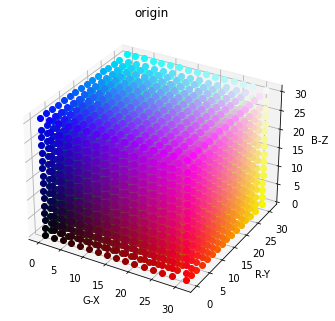

In [15]:
fig = plt.figure()
ax = Axes3D(fig)
size = 16
points = np.linspace(0, 31, size).astype(np.int32)
for z in points:
    for y in points:
        for x in points:
            ax.plot([x], [y], [z], "ro", color=(x / 32, y / 32, z / 32, 1))
ax.set_zlabel('B-Z')
ax.set_ylabel('R-Y')
ax.set_xlabel('G-X')
plt.title("origin")
plt.show()

(32, 1024, 3) uint8


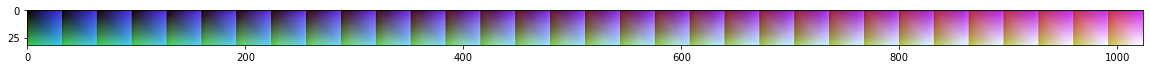

In [16]:
img = cv2.imread("color_grading_LUT.jpg")
print(img.shape, img.dtype)
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.show()

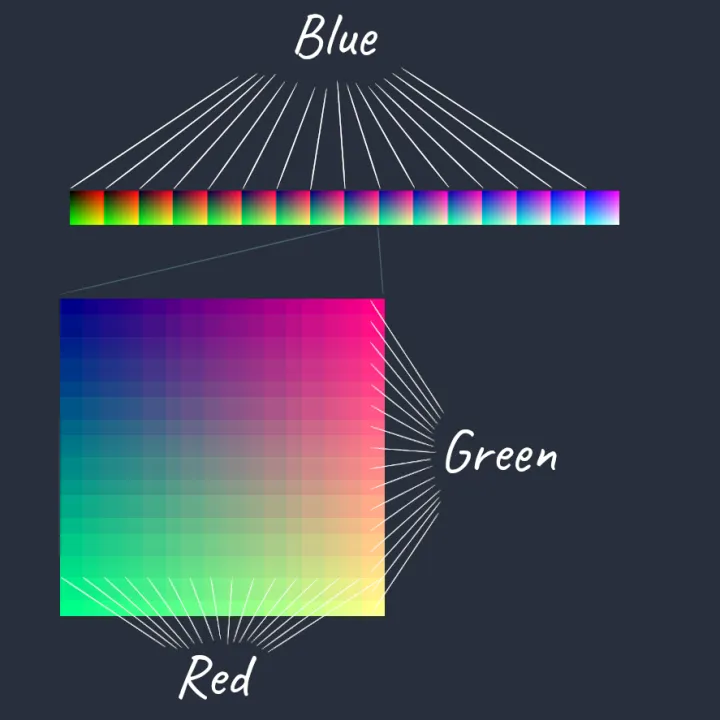
R：每个方形纹理内，R值在水平往右的方向上由0到1递增 <br>
G：每个方形纹理内，G值在竖直往下的方向上由0到1递增 <br>
B：每个方形纹理内，B值不变；B值对于横向拼凑的一组方形纹理而言，从左往右由0到1递增 <br>
也可以将一组方形纹理想象成在空间中竖直叠加起来，那么原RGB值则可以作为三维坐标，映射到LUT中保存的颜色数据。<br>这样一张LUT图便代表一套颜色的对应关系

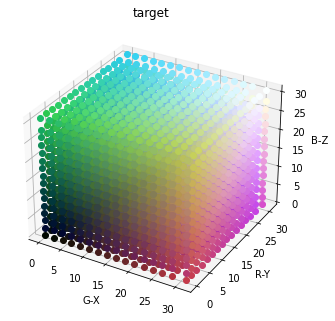

In [18]:
fig = plt.figure()
ax = Axes3D(fig)
size = 16
points = np.linspace(0, 31, size).astype(np.int32)
for z in points:
    for y in points:
        for x in points:
            x1 = x
            y1 = y + 32 * z
            current_rgb = img[x1][y1]
            ax.plot([x], [y], [z], "ro", color=(current_rgb[1] / 255, current_rgb[0] / 255, current_rgb[2] / 255, 1))
ax.set_zlabel('B-Z')
ax.set_ylabel('R-Y')
ax.set_xlabel('G-X')
plt.title("target")
plt.show()